<a href="https://colab.research.google.com/github/vadim13213/image_processing/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BB%D0%B8%D1%86_%D0%B2_OpenCV_%D0%A1%D0%BC%D1%8B%D1%81%D0%BB%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №5. Распознавание лиц в OpenCV**

**Цель:** Сравнить три алгоритма распознавания лиц (EigenFaces, FisherFaces, LBPH) по качеству распознавания, подобрать для каждого лучшие параметры и выбрать наилучший алгоритм.

1. **Подготовка данных:**
   - Соберите набор данных, содержащий изображения лиц различных людей в различных условиях освещения.
   - Разделите данные на обучающую и тестовую выборки.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data_path = '/content/drive/MyDrive/f'

In [10]:
# Ваш код
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Загрузка каскада Хаара для обнаружения лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Функция для загрузки изображений, обнаружения лиц и создания меток
def load_faces_and_labels(data_path, target_size=(255, 255)):
    faces = []
    labels = []
    label_dict = {}

    # Проходим по всем папкам в указанном пути
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            label_id = len(label_dict)
            label_dict[label_id] = label

            # Проходим по всем изображениям в папке
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    # Обнаружение лиц на изображении
                    detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
                    for (x, y, w, h) in detected_faces:
                        # Обрезка лица
                        face = gray[y:y+h, x:x+w]
                        # Масштабирование лица до целевого размера
                        face_resized = cv2.resize(face, target_size)
                        faces.append(face_resized)
                        labels.append(label_id)

    print(f'Найдено {len(label_dict)} папок. Распознано {len(faces)} лиц.')

    return faces, labels, label_dict

# Функция для распознавания лица на изображении
def recognize_face(image_path, recognizer, label_dict, target_size=(255, 255)):
    image = cv2.imread(image_path)
    if image is None:
        return "Ошибка: не удалось загрузить изображение", None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Обнаружение лиц на изображении
    detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    results = []
    for (x, y, w, h) in detected_faces:
        face = gray[y:y+h, x:x+w]
        # Масштабирование лица до целевого размера
        face_resized = cv2.resize(face, target_size)
        label, confidence = recognizer.predict(face_resized)
        if confidence < 20000:  # Пороговое значение можно настроить
            result = f"Распознано лицо: {label_dict[label]} (Уверенность: {confidence:.2f})"
        else:
            result = "Лицо не распознано"
        results.append((x, y, w, h, result))

    return results, image


In [11]:
# Загрузка данных
faces, labels, label_dict = load_faces_and_labels(data_path)

Найдено 2 папок. Распознано 6 лиц.


В каждой папке 12 изображений, но лиц получилось больше 🤔

Вероятно на каких-то изображениях были обнаружены ложные лица (если учитывать что на одном изображении одно лицо)

2. **Реализация алгоритмов:**
   - Реализуйте три алгоритма распознавания лиц в OpenCV: EigenFaces, FisherFaces и LBPH.
   - Для каждого алгоритма используйте функции `cv2.face.createEigenFaceRecognizer()`, `cv2.face.createFisherFaceRecognizer()` и `cv2.face.createLBPHFaceRecognizer()` соответственно.

In [12]:
# Ваш код
recognizer_eigen = cv2.face.EigenFaceRecognizer_create()
recognizer_eigen.train(faces, np.array(labels))

recognizer_fisher = cv2.face.FisherFaceRecognizer_create()
recognizer_fisher.train(faces, np.array(labels))

recognizer_lbph = cv2.face.LBPHFaceRecognizer_create()
recognizer_lbph.train(faces, np.array(labels))

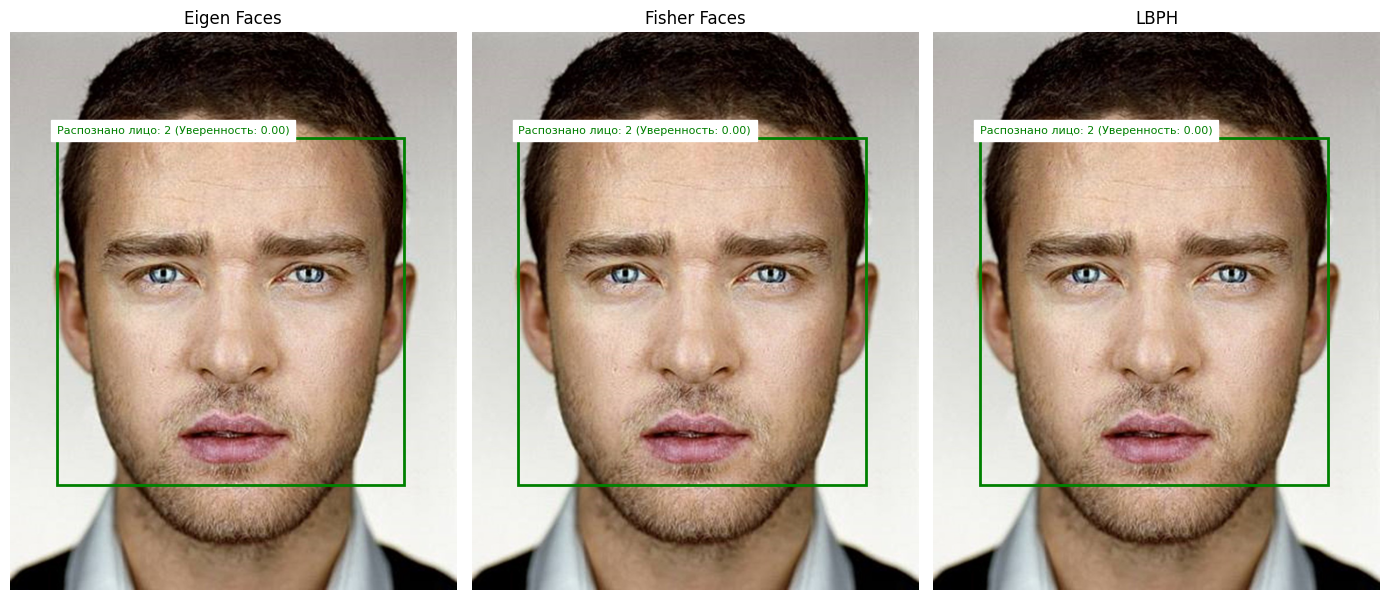

In [15]:
test_image_path = '/content/drive/MyDrive/f/2/333.jpg'

def print_image(path: str, label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph):

    result_eigen, image_eigen = recognize_face(path, recognizer_eigen, label_dict)
    result_fisher, image_fisher = recognize_face(path, recognizer_fisher, label_dict)
    result_lbph, image_lbph = recognize_face(path, recognizer_lbph, label_dict)

    if image_eigen.any() and image_fisher.any() and image_lbph.any() is not None:
        plt.figure(figsize=(14, 8))
        plt.subplot(1, 3, 1)
        plt.title('Eigen Faces')
        plt.imshow(cv2.cvtColor(image_eigen, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()

        for (x, y, w, h, result) in result_eigen:
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='g', linewidth=2))
            plt.text(x, y-10, result, color='g', fontsize=8, backgroundcolor='w')

        plt.subplot(1, 3, 2)
        plt.title('Fisher Faces')
        plt.imshow(cv2.cvtColor(image_fisher, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()

        for (x, y, w, h, result) in result_fisher:
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='g', linewidth=2))
            plt.text(x, y-10, result, color='g', fontsize=8, backgroundcolor='w')

        plt.subplot(1, 3, 3)
        plt.title('LBPH')
        plt.imshow(cv2.cvtColor(image_lbph, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()

        for (x, y, w, h, result) in result_lbph:
            plt.gca().add_patch(plt.Rectangle((x, y), w, h, fill=False, edgecolor='g', linewidth=2))
            plt.text(x, y-10, result, color='g', fontsize=8, backgroundcolor='w')

        plt.show()
    else:
        print("Не удалось загрузить тестовое изображение.")

print_image(test_image_path, label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph)

3. **Подбор параметров:**
   - Для EigenFaces и FisherFaces подберите оптимальное значение `num_components`, начиная с 0 и увеличивая до тех пор, пока качество не начнет ухудшаться.
   - Для LBPH подберите оптимальные значения `radius`, `neighbors`, `grid_x` и `grid_y`, начиная с значений по умолчанию и изменяя их в разумных пределах.
   - Для всех алгоритмов подберите оптимальное значение `threshold`, начиная с `DBL_MAX` и уменьшая до тех пор, пока качество не начнет ухудшаться.

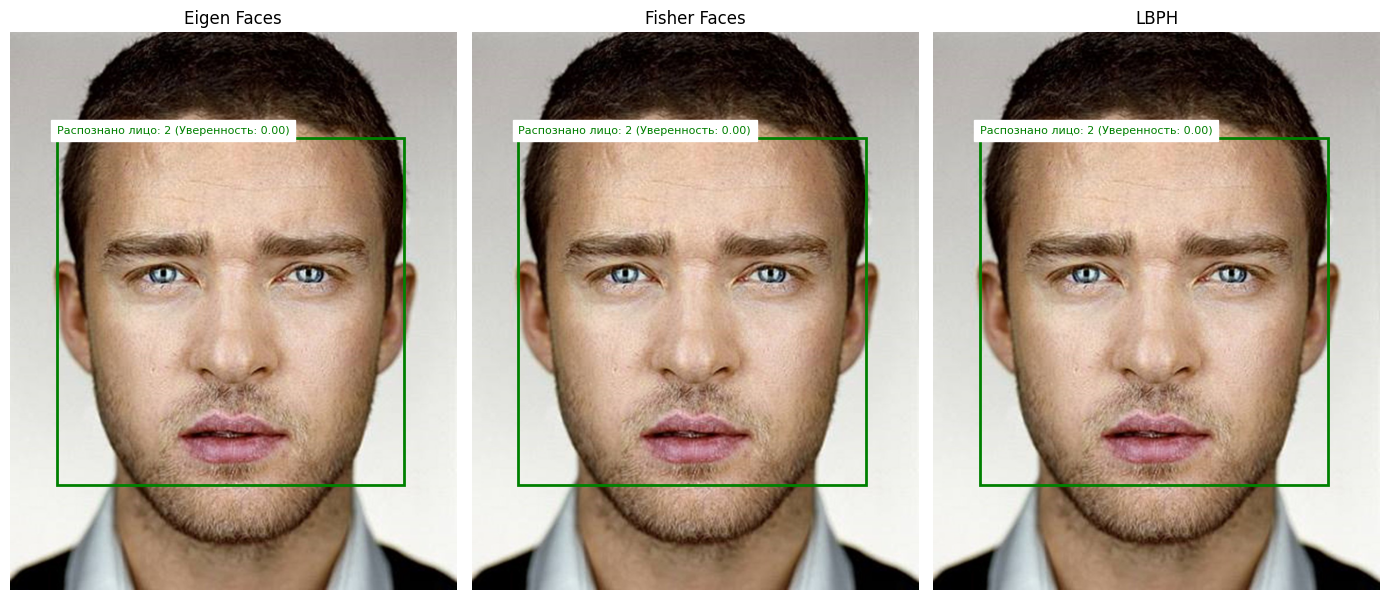

In [17]:
# Ваш код
recognizer_eigen = cv2.face.EigenFaceRecognizer_create(num_components=3, threshold=3000) # если увеличить num_components уверенность возрастает и неверно распознаются лица
                                                                                          # почему то подошло только число 2 при 1 или 3 лица начинают распозноваться неверно
                                                                                          # (нужна тонкая настройка, основывающаяся на количестве обучающих данных)
recognizer_eigen.train(faces, np.array(labels))

recognizer_fisher = cv2.face.FisherFaceRecognizer_create(num_components=(len(label_dict)-1), threshold=3000) # с увеличением num_components возрастает уверенность
                                                                                          # (если значение >= числу классов, то это соответсвует стандартным значениям) лучше ставить стандартные значения
recognizer_fisher.train(faces, np.array(labels))

#recognizer_lbph = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8, grid_x=8, grid_y=8, threshold=1000)
recognizer_lbph = cv2.face.LBPHFaceRecognizer_create(radius=2, neighbors=10, grid_x=10, grid_y=10, threshold=1000) # для этого алгоритма подходят стандартные параметры (пока не менее в этом случае)
                                                                                          # хотя если начать изменять параметры, то уверенность начинает возрастать, а лица при этом распознаются правильнее
recognizer_lbph.train(faces, np.array(labels))
# threshold лучше оставлять стандартным. Так при распозновании будет написано хотя бы вероятное предпложение, а не "Лицо не распознано"

print_image(test_image_path, label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph)

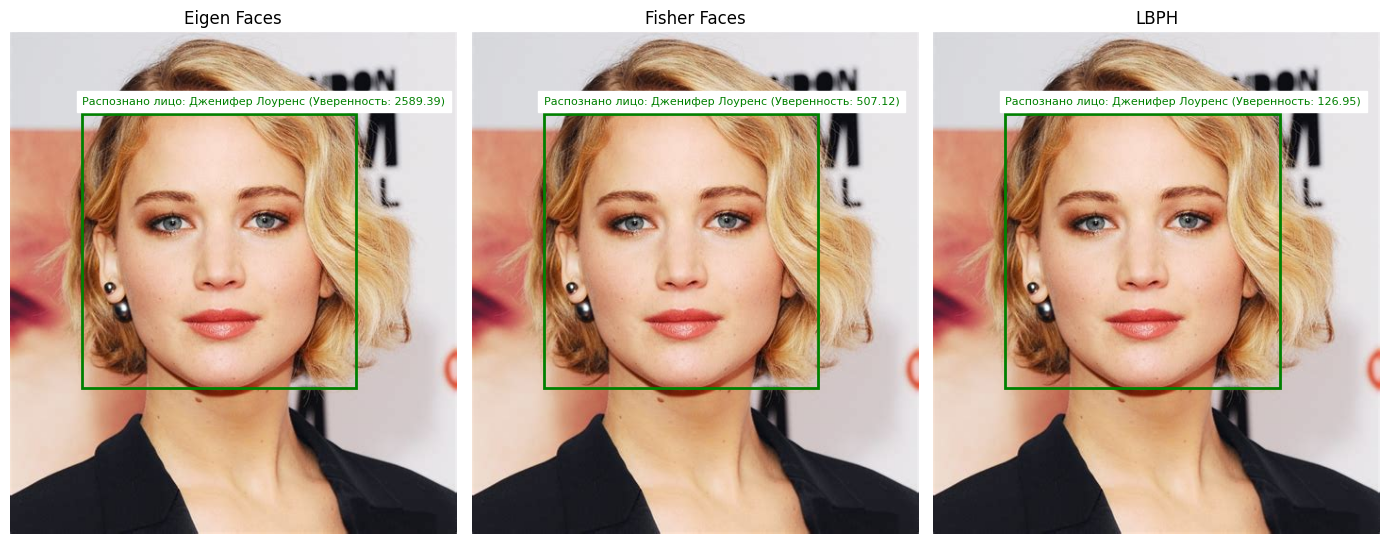

In [ ]:
print_image('/content/drive/MyDrive/Colab Notebooks/IMAGE/test_faces/020_5a08581b.jpg', label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph)

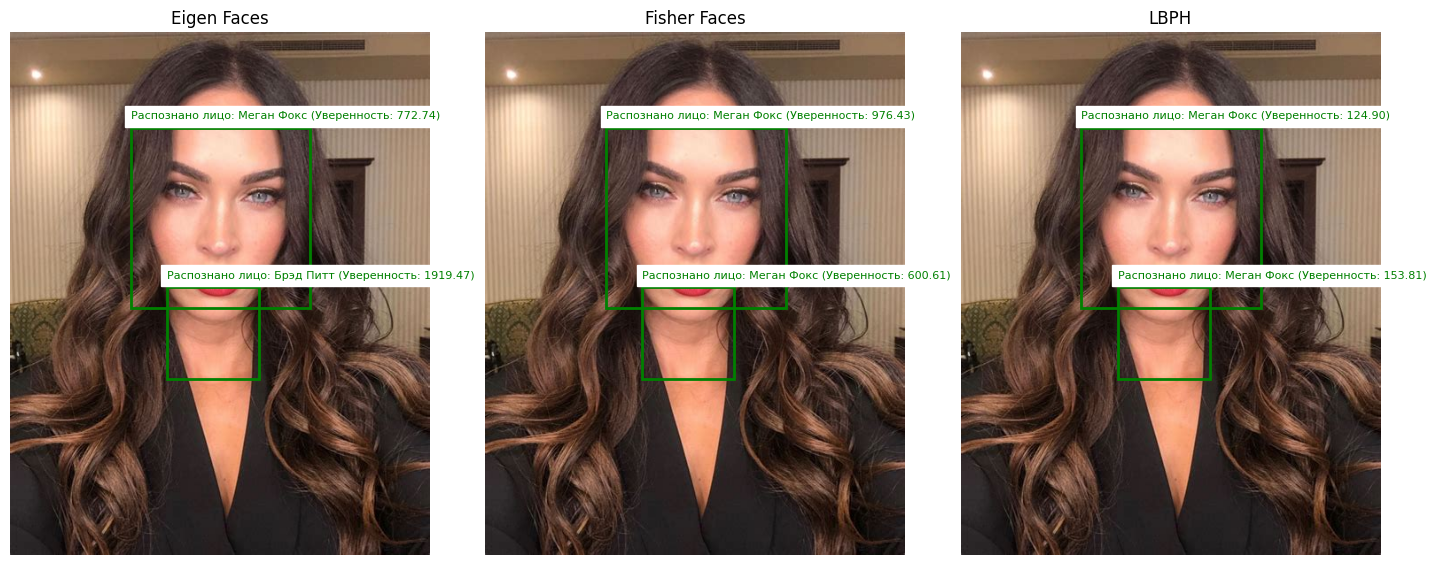

In [ ]:
print_image('/content/drive/MyDrive/Colab Notebooks/IMAGE/test_faces/083_323ae1e8.jpg', label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph)

4. **Оценка качества:**
   - Обучите каждый алгоритм на обучающей выборке с подобранными параметрами.
   - Оцените качество распознавания на тестовой выборке. В тестовой выборке должно быть минимум 10 лиц

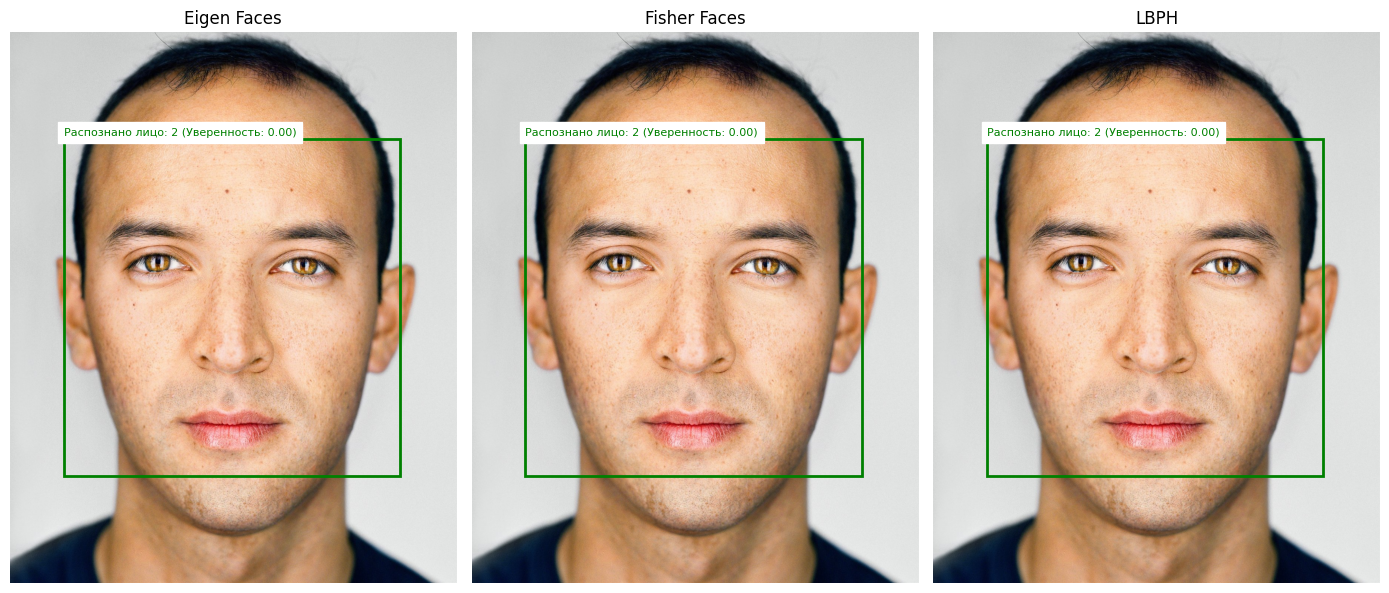

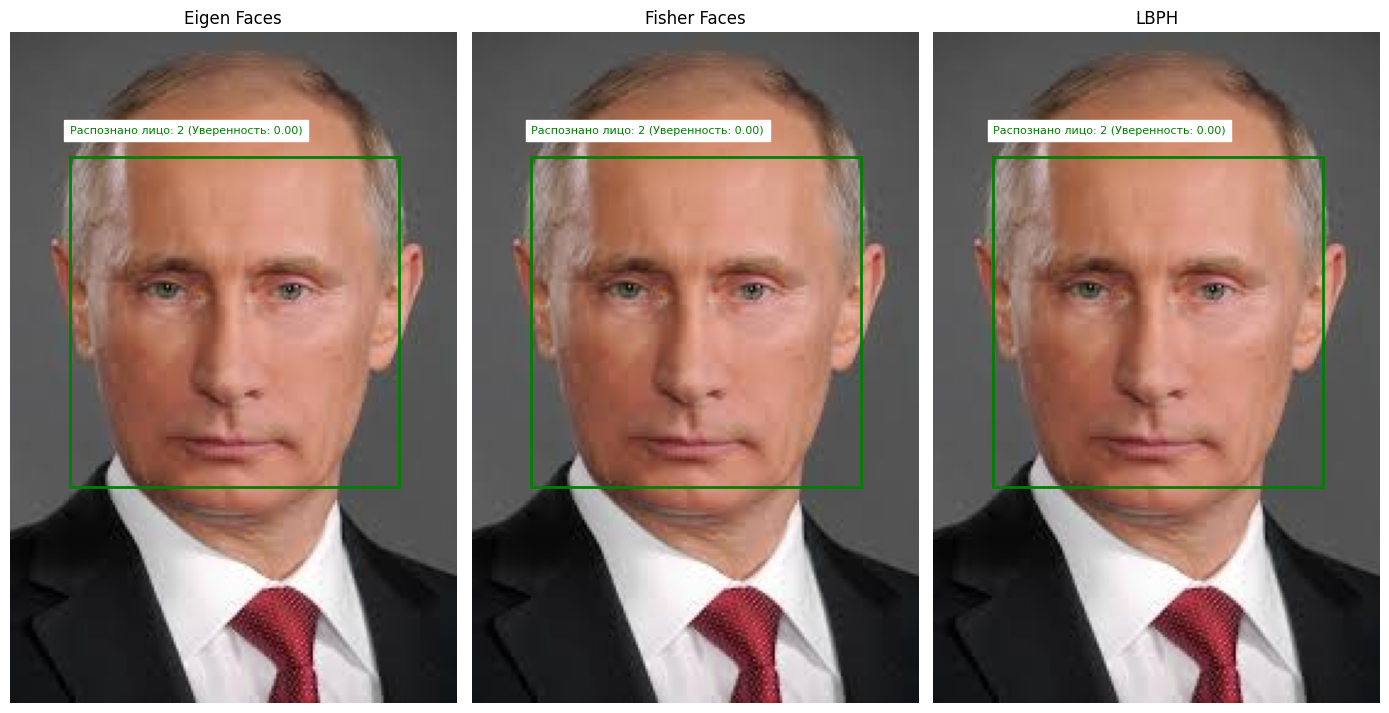

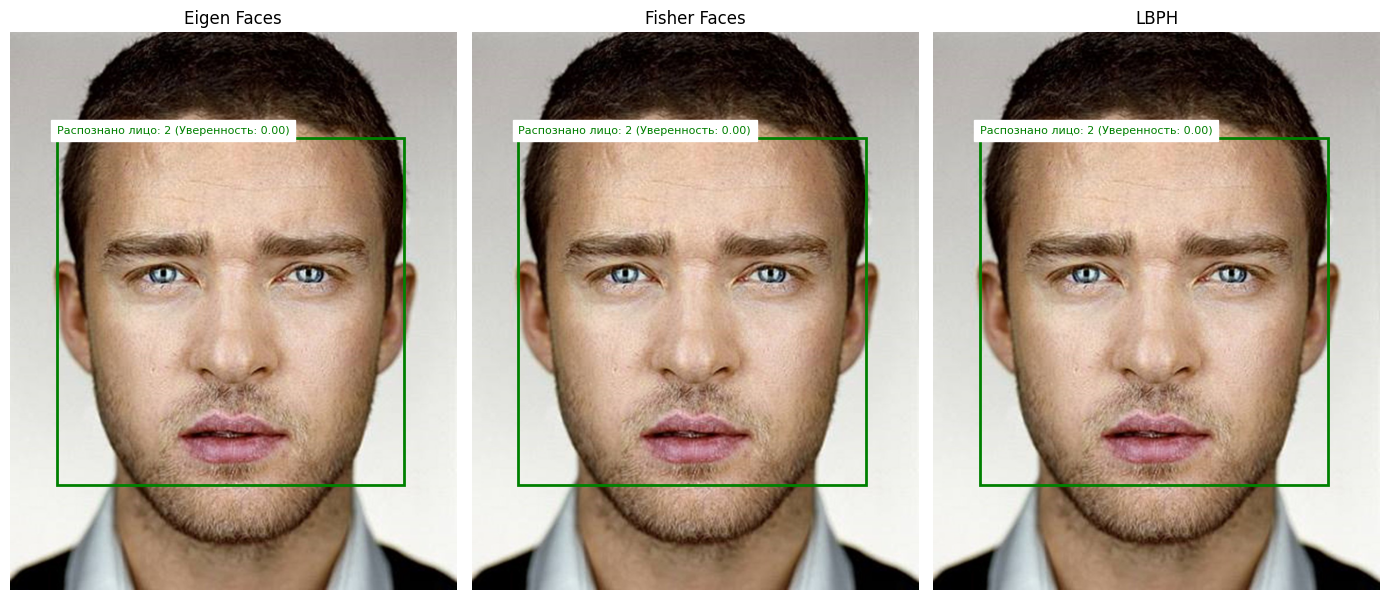

In [18]:
# Ваш код
path_for_test = '/content/drive/MyDrive/f/2'

for image_name in os.listdir(path_for_test):
    image_path = os.path.join(path_for_test, image_name)

    print_image(image_path, label_dict, recognizer_eigen, recognizer_fisher, recognizer_lbph)

5. **Выбор лучшего алгоритма:**
   - На основе результатов сравнения выберите алгоритм, который показал наилучшее качество распознавания лиц.

In [ ]:
# Ваш код
'''
Egen Faces: 8/15
Fisher Faces: 11/15
LBPH: 11/15

Лучший адлгоритм LBPH (пока не менее с текущим набором обучающих и тестовых данных. Вчера у алгоритма было 12/15)
Для него нужно тщательно подбирать параметры, но в целом стандартные тоже показывают хороший результат

Второй лучший Fisher Faces (стандартные значения подходят лучше всего, хоть из-за этого и выше уверенность)
P.S: Если уверенность для этого алгоритма такая же как и для LBPH (чем выше уверенность, тем ниже ее процентная составляющая)
В любом случае для подобного рода программ нужно использовать наборы по больше.

Хоть и алгоритм Fisher Face показал результат хуже, чем LBPH, я бы выбрал его
'''